In [1]:
import csv
import uproot
import numpy  as np
import matplotlib.pyplot as plt

###  Load in HEP DATA

In [2]:
import pandas as pd

b1k_df = pd.read_csv('../HEPData-ins1742786-v1-csv/costheta_{1}^{k}.csv', header=8)
b1k_df

,$\cos\theta_{1}^{k}$,$\cos\theta_{1}^{k}$ LOW,$\cos\theta_{1}^{k}$ HIGH,$\frac{1}{\sigma} \frac{{d}\sigma}{{d}\cos\theta_{1}^{k}}$,stat +,stat -,sys +,sys -
0,-0.833333,-1.000000,-0.666667,0.509051,0.008444,-0.008444,0.015620,-0.015620
1,-0.500000,-0.666667,-0.333333,0.493009,0.006377,-0.006377,0.008172,-0.008172
2,-0.166666,-0.333333,0.000000,0.491092,0.007166,-0.007166,0.010322,-0.010322
3,0.166666,0.000000,0.333333,0.505061,0.007346,-0.007346,0.009771,-0.009771
4,0.500000,0.333333,0.666667,0.502109,0.009652,-0.009652,0.009012,-0.009012
5,0.833333,0.666667,1.000000,0.499678,0.008909,-0.008909,0.016005,-0.016005


In [3]:
b1k_central_value = b1k_df.iloc[:,3]
b1k_central_value

0    0.509051
1    0.493009
2    0.491092
3    0.505061
4    0.502109
5    0.499678
Name: $\frac{1}{\sigma} \frac{{d}\sigma}{{d}\cos\theta_{1}^{k}}$, dtype: float64

### Load in current unfolded file

In [4]:
uproot_fileptr = uproot.open('/scratch/brown/bakshi3/TopSpinCorr_Run2_generalized_ND/CMSSW_10_6_30/src/TopAnalysis/Configuration/analysis/diLeptonic/TUnfoldResults_2016/Nominal/combined/b1k.root')

In [5]:
[ k for k in uproot_fileptr.keys() if 'TUnfRes' in k]

['b1kTUnfResult;1',
 'b1kTUnfResult_rebinnedB;1',
 'b1kTUnfResult_rebinnedA;1',
 'b1kTUnfResultCor;1',
 'b1kTUnfResultCor_rebinnedA;1',
 'b1kTUnfResultCor_rebinnedB;1']

In [6]:
unfolded_result_corr = uproot_fileptr['b1kTUnfResultCor_rebinnedA'].to_numpy()[0]
unfolded_result_corr

array([145.91275445, 135.29704575, 136.45144569, 136.37151953,
       137.93743885, 132.2449331 ])

In [7]:
# Normalize
unfolded_result_corr = np.divide(unfolded_result_corr, np.sum(unfolded_result_corr))

# And divide by bin width
unfolded_result_corr = unfolded_result_corr/0.33

In [9]:
ratio_central = np.divide(b1k_central_value, unfolded_result_corr)

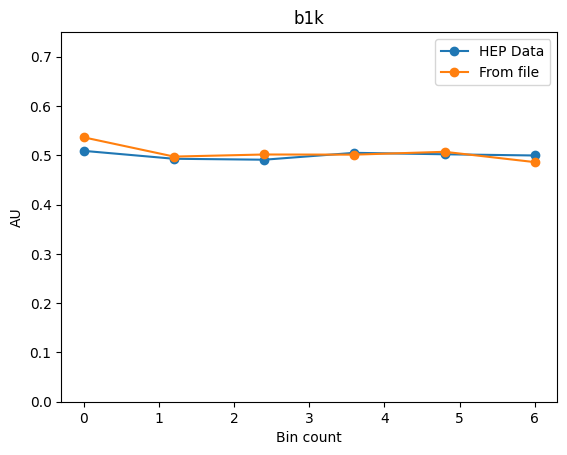

In [17]:
plt.plot(np.linspace(0,6,6), b1k_central_value, 'o-', label = 'HEP Data')
plt.plot(np.linspace(0,6,6), unfolded_result_corr, 'o-', label = 'From file')
plt.ylim(0,0.75)
plt.xlabel('Bin count')
plt.ylabel('AU')
plt.title('b1k')
plt.legend()

Text(0.5, 1.0, 'Ratio b1k')

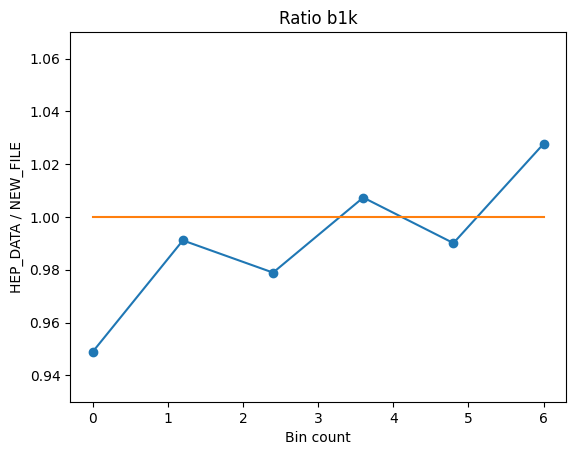

In [15]:
plt.plot(np.linspace(0,6,6), ratio_central, 'o-')
plt.plot(np.linspace(0,6,6), np.ones(6))
plt.ylim(0.93,1.07)
plt.xlabel('Bin count')
plt.ylabel('HEP_DATA / NEW_FILE')
plt.title('Ratio b1k')

### Comparison of stat unc

In [18]:
stat_from_df = b1k_df.iloc[:,4]
syst_from_df = b1k_df.iloc[:,6]

total_from_df = np.sqrt(stat_from_df**2 + syst_from_df**2)
total_from_df

0    0.017756
1    0.010366
2    0.012566
3    0.012224
4    0.013205
5    0.018317
dtype: float64

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f20fb6764d0>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f20fb6c4220>, text=[])

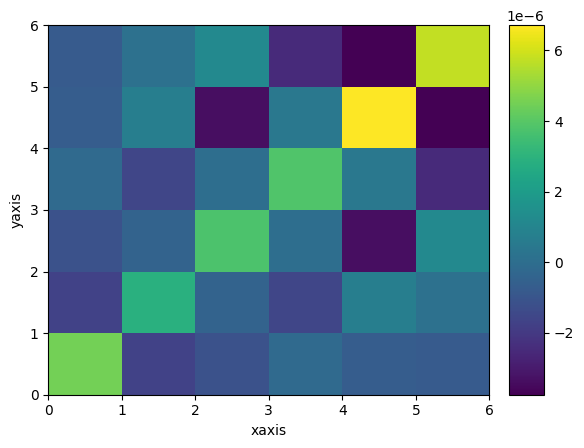

In [19]:
uproot_fileptr['b1kEmatrixNorm_rebinnedA'].to_hist().plot()

In [32]:
# Diagnol elements of Ematrix scaled by the bin width
statcovmat      = uproot_fileptr['b1kEmatrixNorm_rebinnedA'].to_numpy()[0]
stat_from_file  = np.array([np.sqrt(statcovmat[i][i]) for i in range(len(statcovmat))])
stat_from_file /= 0.33 

Text(0.5, 1.0, 'Ratio stat uncertainties')

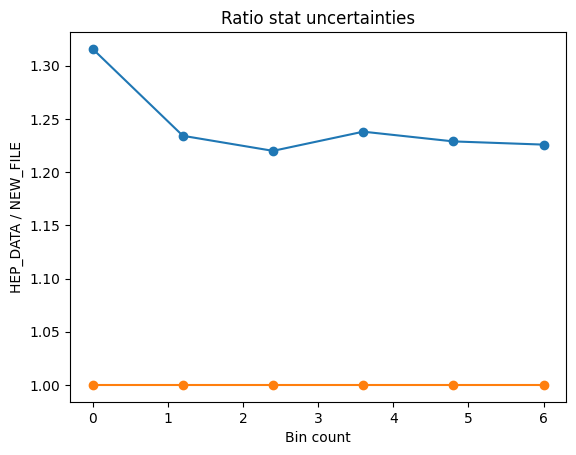

In [33]:
plt.plot(np.linspace(0,6,6), np.divide(stat_from_df, stat_from_file),'o-')
plt.plot(np.linspace(0,6,6), np.ones(6) ,'o-')
plt.xlabel('Bin count')
plt.ylabel('HEP_DATA / NEW_FILE')
plt.title('Ratio stat uncertainties')

### Try with hist variances

In [34]:
total_std   = uproot_fileptr['b1kTUnfResultCor_rebinnedA'].to_hist().variances()
central_val = uproot_fileptr['b1kTUnfResultCor_rebinnedA'].to_hist().values()

In [35]:
rel_std = np.divide(np.sqrt(total_std), central_val)
rel_std

array([0.0134874 , 0.01018442, 0.01174192, 0.01184176, 0.01543906,
       0.01518724])

Text(0.5, 1.0, 'Ratio uncertainties')

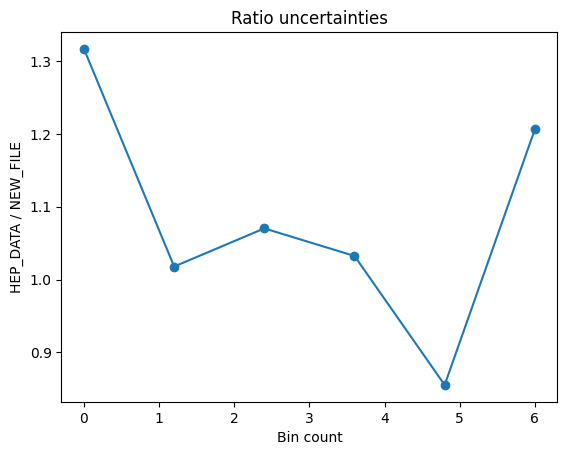

In [36]:
plt.plot(np.linspace(0,6,6), np.divide(total_from_df, rel_std), '-o')
plt.xlabel('Bin count')
plt.ylabel('HEP_DATA / NEW_FILE')
plt.title('Ratio uncertainties')

In [28]:
total_from_df

0    0.017756
1    0.010366
2    0.012566
3    0.012224
4    0.013205
5    0.018317
dtype: float64